In [16]:
library(ggmap) 
library(ggplot2) 
library(maps) 
library(mapproj) 
# or you can try e.g. require(maps) 
# map("usa") 

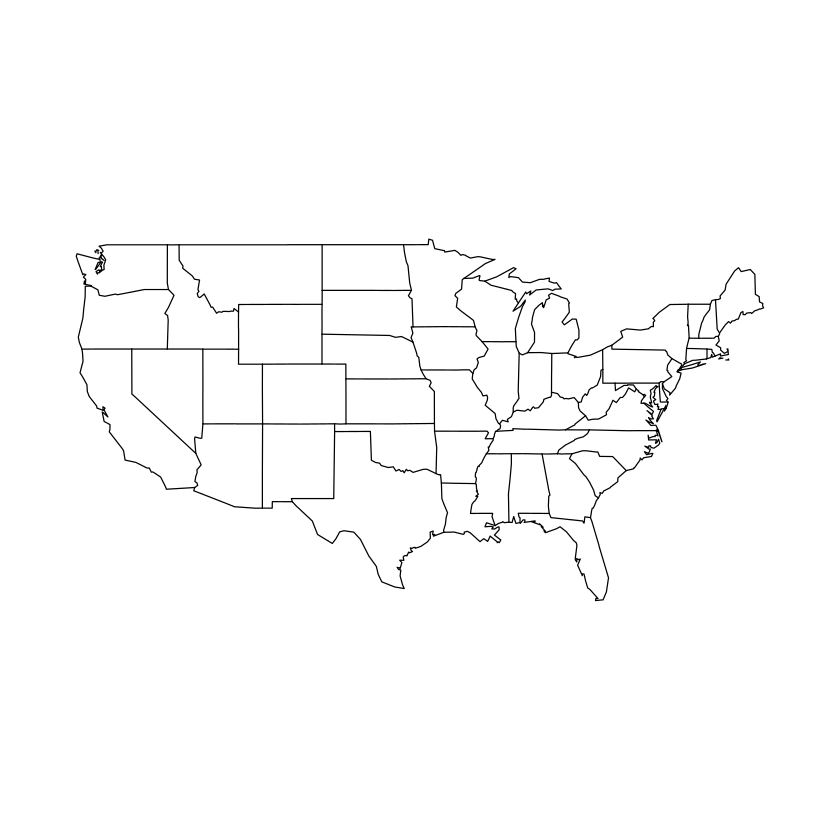

In [19]:
map('state')

Read data

In [21]:
data <- read.csv('files/Household-heating-by-State-2008.csv')
head(data)
names(data) # or colnames(data)

,Congressional.District,Two.Digit.District,Average.Household.Size,X..Housing.Units.That.Are.Mobile.Homes,X..Housing.Units.Built.in.2005.or.Later,X..Housing.Units.Built.in.1939.or.Earlier,X..Homes.Heated.Principally.With.Gas,X..Homes.Heated.Principally.With.Electricity,X..Homes.Heated.Principally.with.Fuel.Oil..Kerosene..Etc.,State,States
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
1,Alabama 1,AL-01,2.49,11.9,4.5,4.5,37,62.1,0.1,AL,Alabama
2,Alabama 2,AL-02,2.52,17.0,3.9,6.2,34.1,64.6,0.2,AL,Alabama
3,Alabama 3,AL-03,2.42,18.6,5.3,7.4,41,56.3,0.3,AL,Alabama
4,Alabama 4,AL-04,2.54,19.9,2.6,7.2,39.4,57.3,0.7,AL,Alabama
5,Alabama 5,AL-05,2.47,10.4,5.9,4.8,33.9,64.3,0.6,AL,Alabama
6,Alabama 6,AL-06,2.57,11.9,5.8,5.0,51.4,47.4,0.2,AL,Alabama


[1] "Congressional.District"                                   
 [2] "Two.Digit.District"                                       
 [3] "Average.Household.Size"                                   
 [4] "X..Housing.Units.That.Are.Mobile.Homes"                   
 [5] "X..Housing.Units.Built.in.2005.or.Later"                  
 [6] "X..Housing.Units.Built.in.1939.or.Earlier"                
 [7] "X..Homes.Heated.Principally.With.Gas"                     
 [8] "X..Homes.Heated.Principally.With.Electricity"             
 [9] "X..Homes.Heated.Principally.with.Fuel.Oil..Kerosene..Etc."
[10] "State"                                                    
[11] "States"

In [26]:
names(data)[4] <- 'MobileHomes'
names(data)

[1] "Congressional.District"                                   
 [2] "Two.Digit.District"                                       
 [3] "Average.Household.Size"                                   
 [4] "MobileHomes"                                              
 [5] "X..Housing.Units.Built.in.2005.or.Later"                  
 [6] "X..Housing.Units.Built.in.1939.or.Earlier"                
 [7] "X..Homes.Heated.Principally.With.Gas"                     
 [8] "X..Homes.Heated.Principally.With.Electricity"             
 [9] "X..Homes.Heated.Principally.with.Fuel.Oil..Kerosene..Etc."
[10] "State"                                                    
[11] "States"

Group the `MobileHomes` column by group to compute the mean:

In [71]:
ag <- aggregate(MobileHomes ~ States, FUN = mean, data = data) # a data.frame

In [57]:
# How many states are there
head(ag)
dim(ag)

,States,MobileHomes
,<fct>,<dbl>
1,Alabama,14.371429
2,Alaska,4.600000
3,Arizona,10.375000
4,Arkansas,12.425000
5,California,3.692453
6,Colorado,4.528571


[1] 51  2

In [73]:
# You may wanna delete this
m <- ag$States == '#N/A'
ag[m,]

,States,MobileHomes
,<fct>,<dbl>
27,#N/A,0


___
Two ways to delete a row:
- 1st:
```r
df <- df[-c(1, 2)] # delete row 1 and 2
```
- 2nd:
```r
df <- df[boolean_mask]
```
___


In [81]:
# Use the boolean mask
ag <- ag[!m,]
dim(ag)

[1] 50  2

Get map data (built-in map data in ggplot2 package):

In [83]:
m.usa <- map_data("state") # we want the states 
head(m.usa) 
dim(m.usa) # more info than we need

,long,lat,group,order,region,subregion
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,-87.46201,30.38968,1,1,alabama,NA
2,-87.48493,30.37249,1,2,alabama,NA
3,-87.52503,30.37249,1,3,alabama,NA
4,-87.53076,30.33239,1,4,alabama,NA
5,-87.57087,30.32665,1,5,alabama,NA
6,-87.58806,30.32665,1,6,alabama,NA


[1] 15537     6

Force our states to lowercase to match the map, keep also one column of data

In [85]:
# Technically create a new data.frame with 3 columns
df <- data.frame(
    region = tolower(ag$States),
    MobileHomes = ag$MobileHomes,
    stringAsFactors = F)

dim(df)

[1] 50  3

Plot the data.frame on a map

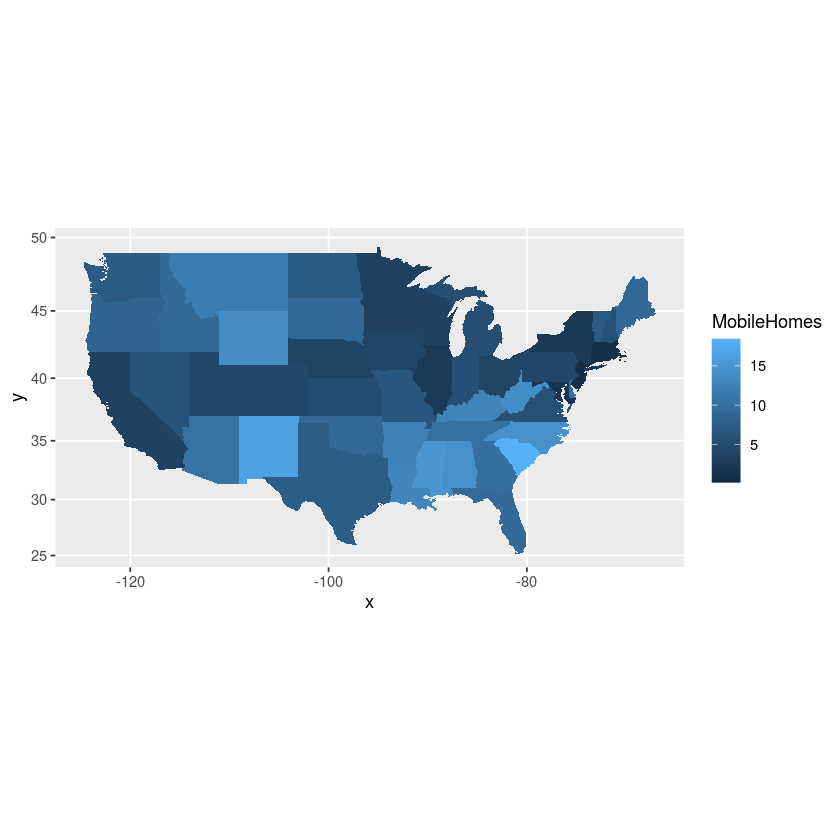

In [86]:
# Create a empty canvas
ggplot(df, aes(map_id = region)) +   
  # draw the grid
  expand_limits(x = m.usa$long, y = m.usa$lat) +    
  # draw a us map, fill = MobileHomes means color the map according to MobileHomes property
  geom_map(aes(fill = MobileHomes), map = m.usa) +  
  # fix the ratio of the x and y axises, to match a map
  coord_map()    